# Especialização em Inteligência Artificial

**Aprendizado de Máquina - Web Conf 2: Exemplo de experimentos de meta-aprendizado**

Código de exemplo desenvolvido pelo docente [Adriano Rivolli](mailto:rivolli@utpfr.edu.br)

*O código a seguir ilustra um exemplo de meta-aprendizado para predição da performance do algoritmo Random Forest para alguns datasets*

In [ ]:
!pip install pymfe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.0/156.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 38.5 MB/s eta 0:00:00


#### Exemplo da extração das meta-features

Detalhes sobre a ferramenta MFE está disponível em https://pypi.org/project/pymfe/

In [ ]:
from sklearn.datasets import load_iris
from pymfe.mfe import MFE
import pandas as pd

data = load_iris()
y = data.target
X = data.data

# Extract default measures
mfe = MFE()
mfe.fit(X, y)

ft = mfe.extract()
pd.DataFrame(ft).transpose()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1
0,attr_conc.mean,0.209805
1,attr_conc.sd,0.119588
2,attr_ent.mean,2.277191
3,attr_ent.sd,0.061039
4,attr_to_inst,0.026667
...,...,...
106,var_importance.mean,0.25
107,var_importance.sd,0.448885
108,w_lambda,0.023439
109,worst_node.mean,0.6


#### Exemplo da definição do meta-target

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfmodel = RandomForestClassifier(n_estimators=100, random_state=0)
cross_val_score(rfmodel, X, y, scoring='f1_macro').mean()

0.9664818612187034

## Carregando a meta-base de exemplo

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive",force_remount=True)


df = pd.read_csv("/content/drive/MyDrive/UTFPR/aulas/machine learning (especialização)/codigos/webconf/metabase.csv")
df

Mounted at /content/drive


,attr_ent.mean,attr_to_inst,c1,c2,ch,class_conc.mean,class_ent,cls_coef,cohesiveness.mean,cohesiveness.sd,...,tree_imbalance.mean,tree_shape.mean,tree_shape.sd,var.mean,var_importance.mean,vdb,vdu,wg_dist.mean,wg_dist.sd,f1_score_mean
0,0.579641,0.022841,0.998576,0.003940,97.874206,0.023084,0.998576,0.521931,138.707241,27.831696,...,0.054819,0.053968,0.095258,1.295677e-01,0.013514,5.657983,8.181646e-08,4.046725,0.283796,0.932097
1,0.558246,0.143357,0.877845,0.282535,6.212663,0.016527,0.877845,0.564817,25.958698,3.935352,...,0.046533,0.047512,0.082962,1.213932e-01,0.023810,6.224478,0.000000e+00,2.965967,0.216752,0.682516
2,0.443223,0.014279,0.999068,0.002580,1031.271064,0.067355,0.999068,0.314409,287.499311,43.801411,...,0.138383,0.221875,0.137484,9.684164e-02,0.008621,2.785010,1.943476e-08,4.453884,0.219623,0.921453
3,0.736018,0.061000,0.881291,0.275862,24.482507,0.024880,0.881291,0.597572,54.392562,7.938076,...,0.073176,0.032167,0.047142,1.306251e+05,0.016393,4.661398,1.091311e-09,3.680220,0.202430,0.744490
4,2.958106,0.010417,0.933134,0.167247,24.299108,0.012490,0.933134,0.476226,374.950521,17.268788,...,0.085860,0.043972,0.057816,1.893059e+03,0.125000,4.427474,3.677824e-08,0.578019,0.119677,0.765158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,3.236414,0.050000,1.000000,0.000000,28.684324,0.022221,1.000000,0.514326,429.047188,49.092220,...,0.062769,0.025795,0.040250,8.967501e+03,0.010000,8.213684,2.226715e-07,1.831781,0.168758,0.721344
244,0.904463,0.071000,0.862837,0.310869,220.779895,0.107154,0.862837,0.463139,78.779529,30.661251,...,0.057178,0.046557,0.073142,7.970908e-02,0.007042,2.703145,1.736303e-09,4.373487,0.630044,0.935057
245,0.355674,0.048000,0.794208,0.426982,0.927307,0.012073,0.794208,0.496277,196.347875,29.015804,...,0.035608,0.015710,0.047220,1.174012e+08,0.010417,28.403722,1.357122e-12,2.864240,0.236769,0.839153
246,2.455310,0.050000,0.970951,0.076923,1.223225,0.000457,0.970951,0.570902,416.941875,64.198445,...,0.037409,0.012880,0.046547,6.666411e-01,0.010000,38.468156,1.818626e-09,1.854147,0.219069,0.537216


## Executando o experimento de Meta-learning

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

preds = cross_val_predict(RandomForestRegressor(), X, y, cv=10)
print('RMSE: ', sqrt(mean_squared_error(y, preds)))
print('R2: ', r2_score(y, preds))

RMSE:  0.06352380081367162
R2:  0.8015207866507204


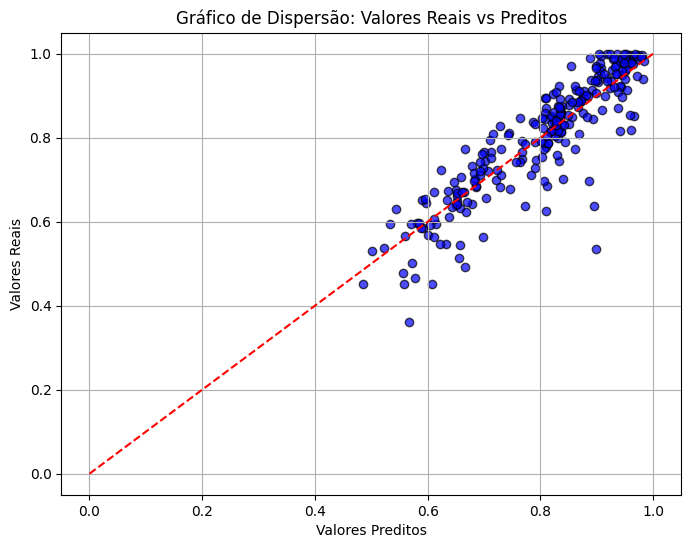

In [ ]:
import matplotlib.pyplot as plt

# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(preds, y, color='blue', edgecolors='k', alpha=0.7)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Adicionar títulos e rótulos aos eixos
plt.title('Gráfico de Dispersão: Valores Reais vs Preditos')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

# Mostrar o gráfico
plt.grid(True)
plt.show()

### Gerando a lista das meta-features mais importantes

In [ ]:
# Treinar o Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X, y)

# Obter as importâncias das features
importancias = rf.feature_importances_

# Criar um DataFrame com as features e suas importâncias
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': importancias
})

# Classificar as features por importância e selecionar as 15 mais importantes
top_15_features = feature_importances.sort_values(by='importance', ascending=False).head(15)

# Exibir as 15 features mais importantes
print(top_15_features)

           feature  importance
28         l2.mean    0.632985
52  nodes_per_inst    0.070608
27         l1.mean    0.059554
29         l3.mean    0.029044
4               ch    0.027150
45              n1    0.017407
23    inst_to_attr    0.009187
51  nodes_per_attr    0.008296
47           n3.sd    0.007725
67              pb    0.007717
46         n3.mean    0.006331
74              t2    0.006251
15         f4.mean    0.005988
59         nr_inst    0.005632
7         cls_coef    0.004773
